# Loan Prediction 

In [63]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_selection import mutual_info_classif

In [23]:
df = pd.read_csv("loan_data.csv")
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## EDA

In [12]:
df_full_train, df_test = train_test_split(df, test_size=0.2,)
df_train, df_val = train_test_split(df_full_train, test_size=0.25,)
len(df_train), len(df_val), len(df_test)

(27000, 9000, 9000)

In [13]:
df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [14]:
y_train = df_train.loan_status.values
y_val = df_val.loan_status.values
y_test = df_test.loan_status.values

In [15]:
del df_train["loan_status"]
del df_val["loan_status"]
del df_test["loan_status"]

In [40]:
cat_cols = [var for var in df.columns if df[var].dtypes == 'object']
num_cols = [var for var in df.columns if df[var].dtypes != 'object']

print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')

Categorical columns: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns: ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'loan_status']


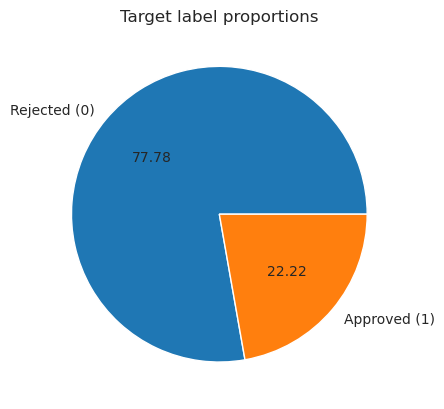

In [41]:
label_prop = df["loan_status"].value_counts()

plt.pie(label_prop.values, labels=["Rejected (0)", "Approved (1)"], autopct="%.2f")
plt.title("Target label proportions")
plt.show()

In [55]:
global_loan_rate = (df_full_train.loan_status.mean())

female_loan = df_full_train[df_full_train.person_gender == "female"].loan_status.mean()
male_loan = df_full_train[df_full_train.person_gender == "male"].loan_status.mean()

print(f" Female Loan rate: {female_loan:.3f}\n Male Loan rate: {male_loan:.3f}\n Global Loan rate:  {global_loan_rate:.3f}")

 Female Loan rate: 0.221
 Male Loan rate: 0.222
 Global Loan rate:  0.222


In [56]:
from IPython.display import display

for c in cat_cols:
    print(c)
    df_group = df_full_train.groupby(c).loan_status.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_loan_rate
    df_group['risk'] = df_group['mean'] / global_loan_rate
    display(df_group)
    print("\n\n")

person_gender


,mean,count,diff,risk
person_gender,,,,
female,0.220705,16189,-0.000933,0.995788
male,0.222402,19811,0.000763,1.003442





person_education


,mean,count,diff,risk
person_education,,,,
Associate,0.217459,9611,-0.004180,0.981142
Bachelor,0.226916,10700,0.005277,1.023809
Doctorate,0.233684,475,0.012045,1.054347
High School,0.221713,9598,0.000074,1.000334
Master,0.217593,5616,-0.004046,0.981744





person_home_ownership


,mean,count,diff,risk
person_home_ownership,,,,
MORTGAGE,0.115314,14803,-0.106324,0.520281
OTHER,0.370787,89,0.149148,1.672931
OWN,0.074521,2402,-0.147118,0.336228
RENT,0.323960,18706,0.102321,1.461658





loan_intent


,mean,count,diff,risk
loan_intent,,,,
DEBTCONSOLIDATION,0.303115,5714,0.081476,1.367608
EDUCATION,0.169672,7320,-0.051967,0.765534
HOMEIMPROVEMENT,0.258307,3852,0.036668,1.165442
MEDICAL,0.277770,6851,0.056131,1.253253
PERSONAL,0.200066,6033,-0.021573,0.902668
VENTURE,0.144462,6230,-0.077177,0.651791





previous_loan_defaults_on_file


,mean,count,diff,risk
previous_loan_defaults_on_file,,,,
No,0.450816,17699,0.229178,2.034013
Yes,0.000000,18301,-0.221639,0.000000


In [59]:
mi = {}
for c in cat_cols:
    mi[c] = mutual_info_score(df_full_train[c], df_full_train.loan_status)

pd.Series(mi).sort_values(ascending=False)

previous_loan_defaults_on_file    0.190579
person_home_ownership             0.035395
loan_intent                       0.010101
person_education                  0.000050
person_gender                     0.000002
dtype: float64

In [66]:
num_cols_for_mi = [c for c in num_cols if c != "loan_status"]
mi_scores = mutual_info_classif(df_full_train[num_cols_for_mi], df_full_train.loan_status)

mi = dict(zip(num_cols_for_mi, mi_scores))
pd.Series(mi).sort_values(ascending=False)

person_income                 0.091844
loan_percent_income           0.081778
loan_int_rate                 0.069731
loan_amnt                     0.013806
person_age                    0.001538
cb_person_cred_hist_length    0.001212
person_emp_exp                0.000000
credit_score                  0.000000
dtype: float64

In [ ]:
# df_full_train[num_cols].corrwith(df_full_train.loan_status)

person_age                   -0.024473
person_income                -0.128342
person_emp_exp               -0.022989
loan_amnt                     0.106887
loan_int_rate                 0.331269
loan_percent_income           0.381999
cb_person_cred_hist_length   -0.018967
credit_score                 -0.008281
loan_status                   1.000000
dtype: float64